In [18]:
# 11-1
import pandas as pd
from sklearn.model_selection import train_test_split 
import torch
from kmeans_pytorch import kmeans, kmeans_predict 

In [19]:
# 11-2
df = pd.read_csv(r"C:\Users\516-29\deep\chap11\data\iris.csv")

In [21]:
# 11-3
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [22]:
# 11-4
from sklearn.model_selection import train_test_split

x, y = train_test_split(data, test_size=0.2, random_state=123)

In [23]:
# 11-5
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [24]:
11-6
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [26]:
# 11-7
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [27]:
# 11-9
num_clusters = 2
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 3it [00:00, 54.55it/s, center_shift=0.000000, iteration=3, tol=0.000100]


In [28]:
# 11-11
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cuda:0..


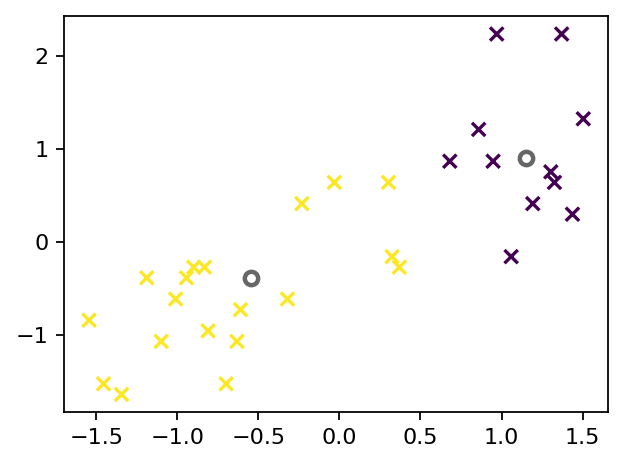

In [29]:
# 11-13
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='viridis', marker='x') 

plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)

plt.tight_layout()
plt.show()

In [30]:
# 11-14
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load(r"C:\Users\516-29\deep\chap11\data\data.npy")

[[2.35393517 2.26260543]]


[[[1.31200014 0.58562528]
  [0.58562528 1.50327178]]]


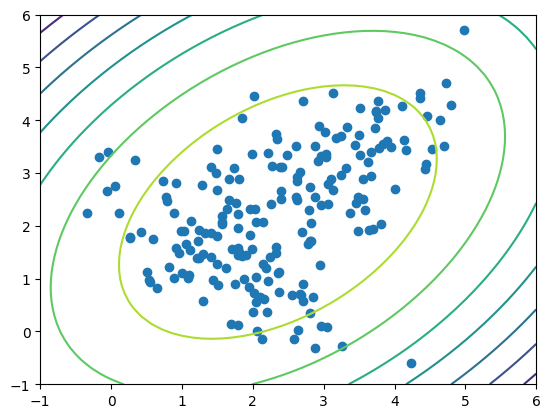

In [31]:
# 11-15
gmm = GaussianMixture(n_components=1)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1, 6))
XX = np.array([X.ravel(), Y.ravel()]).T

Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [32]:
# 11-16
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()
data = digits.data
labels = digits.target

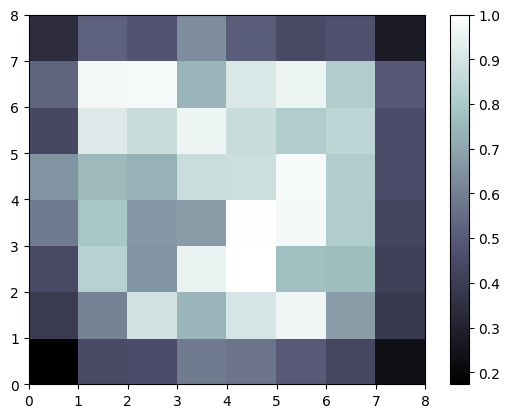

In [33]:
# 11-17
som = MiniSom(8, 8, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)

som.train_random(data,1000)

bone()
pcolor(som.distance_map().T)
colorbar()

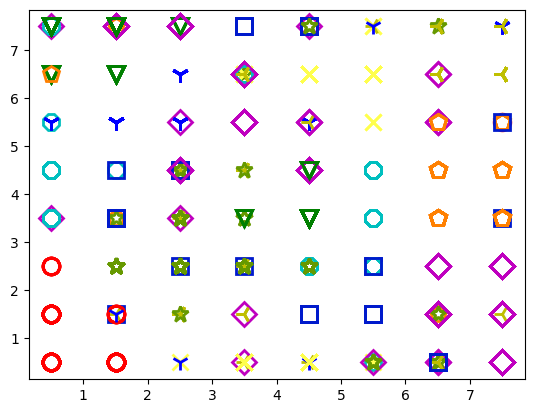

In [36]:
# 11-18
labels[labels=='0'] = 0 
labels[labels=='1'] = 1 
labels[labels=='2'] = 2 
labels[labels=='3'] = 3 
labels[labels=='4'] = 4 
labels[labels=='5'] = 5 
labels[labels=='6'] = 6 
labels[labels=='7'] = 7 
labels[labels=='8'] = 8 
labels[labels=='9'] = 9 

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt, xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5, w[1]+.5, markers[labels[cnt]],
        markerfacecolor='None', markeredgecolor=colors[labels[cnt]],
        markersize=12, markeredgewidth=2)
show()